In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke 
import numpy as np


QFT

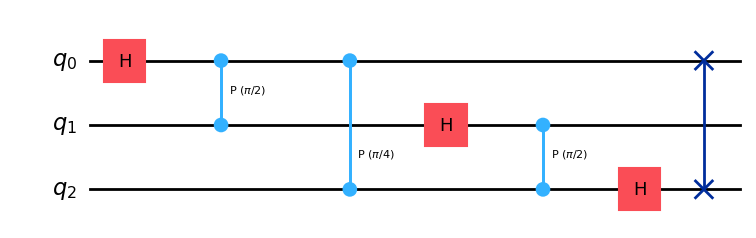

In [2]:
def qft_3qubit():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.cp(np.pi/2, 1, 0)
    qc.cp(np.pi/4, 2, 0)
    qc.h(1)
    qc.cp(np.pi/2, 2, 1)
    qc.h(2)
    # Swap qubits to reverse order
    qc.swap(0, 2)
    return qc

qc_qft = qft_3qubit()
qc_qft.draw('mpl')


IQFT

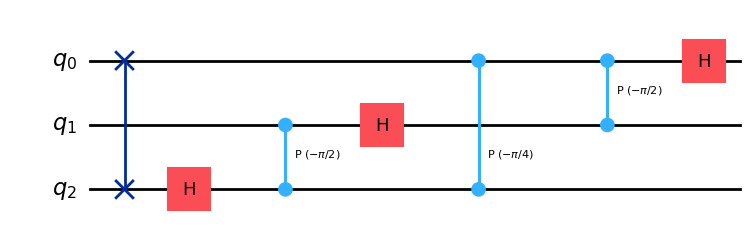

In [3]:
def iqft_3qubit():
    qc = QuantumCircuit(3)
    # Swap qubits to reverse order
    qc.swap(0, 2)
    qc.h(2)
    qc.cp(-np.pi/2, 2, 1)
    qc.h(1)
    qc.cp(-np.pi/4, 2, 0)
    qc.cp(-np.pi/2, 1, 0)
    qc.h(0)
    return qc

qc_iqft = iqft_3qubit()
qc_iqft.draw('mpl')


Phase Estimation Algorithm

Estimating the phase for U = Z (Pauli-Z), eigenvector |1⟩ (phase = 1/2):

Phase Estimation Result: {'011': 429, '101': 446, '111': 72, '001': 77}


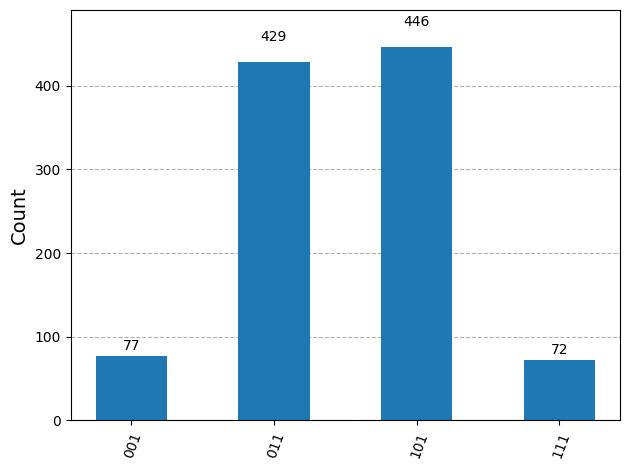

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

n_count = 3

qc = QuantumCircuit(n_count + 1, n_count)

qc.x(n_count)

qc.h(0)
qc.h(1)
qc.h(2)

# Apply controlled-U^2^j gates (U = Z)
qc.cz(0, n_count)
qc.cz(1, n_count)
qc.cz(2, n_count)

# Apply inverse QFT to counting qubits
def iqft_on(qc, qubits):
    n = len(qubits)
    for i in range(n//2):
        qc.swap(qubits[i], qubits[n-i-1])
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), qubits[j], qubits[m])
        qc.h(qubits[j])

iqft_on(qc, [0, 1, 2])

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

sim = AerSimulator()
tqc = transpile(qc, sim)
job = sim.run(tqc, shots=1024)
counts = job.result().get_counts()
print("Phase Estimation Result:", counts)
plot_histogram(counts)
